In [23]:
# cargamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **_1. Lectura (carga) de los Datos_**

In [24]:
# importamos archivo desde github (ojo que la rama se llama master)
df = pd.read_csv('https://raw.githubusercontent.com/ecdiazl/capstone-project/master/Data/df_final_pay_sin_mt.csv')

In [25]:
df.head()

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0
1,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,396.0,96.0,240.0,0.0,132.0,24.0
2,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,394.0,96.0,240.0,0.0,132.0,24.0
3,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,95.0,396.0,96.0,240.0,0.0,132.0,24.0
4,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0


In [26]:
df.columns

Index(['year_2023', 'year_2024', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21',
       'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'day_31', 'shift_B', 'crew_E2', 'crew_E3',
       'crew_E4', 'total', 'efectivo', 'mantencion', 'mecanica', 'electrica',
       'mant_excl', 'mec_excl', 'elec_excl', 'som_excl', 'demora', 'r_prog',
       'r_noprg', 'waiting', 'queued', 'payload', 'distance', 'distance_down',
       'distance_down_level', 'distance_up', 'distance_up_level',
       'expected_time', 'lift_down', 'lift_down_level', 'lift_up',
       'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC', 'KOM-CHQ',
       'KOM.960E5', 'Kom.930E-4'

In [27]:
# calculamos la disponibilidad de los camiones
df['truck_avail'] = (df.total - (df.mantencion + df.mecanica + df.electrica + df.mant_excl + df.mec_excl + df.elec_excl + df.som_excl)) / df.total

In [28]:
df.truck_avail.describe()

count    1567.000000
mean        0.757987
std         0.039612
min         0.622591
25%         0.733914
50%         0.761742
75%         0.786180
max         0.901208
Name: truck_avail, dtype: float64

## **2. Preparamos el Dataset**

In [29]:
# transformamos las variables bool a categorical y le asignamos 0 o 1
for col in df.columns:
  if df[col].dtype == 'bool':
     df[col] = df[col].astype('category').cat.codes
     df[col] = df[col].astype('category') # para que quede como category y no como int8

In [30]:
df.head()

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS,truck_avail
0,0,0,0,0,0,0,0,0,0,0,...,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0,0.841171
1,0,0,0,0,0,0,0,0,0,0,...,0.0,24.0,96.0,396.0,96.0,240.0,0.0,132.0,24.0,0.822237
2,0,0,0,0,0,0,0,0,0,0,...,0.0,24.0,96.0,394.0,96.0,240.0,0.0,132.0,24.0,0.807127
3,0,0,0,0,0,0,0,0,0,0,...,0.0,24.0,95.0,396.0,96.0,240.0,0.0,132.0,24.0,0.818624
4,0,0,0,0,0,0,0,0,0,0,...,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0,0.816905


In [31]:
len(df.columns)

85

In [32]:
# seleccionamos las variables que vamos a usar
df_selected = df[['payload', 'year_2023', 'year_2024', 'month_3', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'day_10', 'day_11', 'day_13', 'day_15', 'day_16',
       'day_17', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25',
       'day_26', 'day_27', 'day_28', 'day_30', 'day_31', 'shift_B', 'crew_E2',
       'crew_E3', 'crew_E4', 'efectivo', 'mantencion', 'mecanica', 'electrica',
       'mant_excl', 'mec_excl', 'demora', 'r_noprg', 'waiting', 'queued',
       'distance_down_level', 'distance_up', 'distance_up_level',
       'expected_time', 'lift_down', 'lift_down_level', 'lift_up',
       'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC', 'KOM-CHQ',
       'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930ER-MT', 'Kom.980E5',
       'Komatsu AHS']]

In [33]:
len(df_selected.columns)

65

In [34]:
df_selected.payload.mean()

np.float64(142357.4639507874)

In [35]:
# agregamos columna de validación del promedio de la variable payload
df_selected['payload_validation'] = np.where(df_selected['payload'] >= df_selected.payload.mean(), 1, 0)

/var/folders/81/70tdhtkn6yzd7lv46bsjk7640000gn/T/ipykernel_1716/2444498298.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_selected.payload_validation

0       1
1       1
2       1
3       1
4       1
       ..
1562    0
1563    0
1564    0
1565    0
1566    0
Name: payload_validation, Length: 1567, dtype: int64

## **3. Análisis Exploratorio de Datos (EDA)**

### **3.1. Distance Up Level**

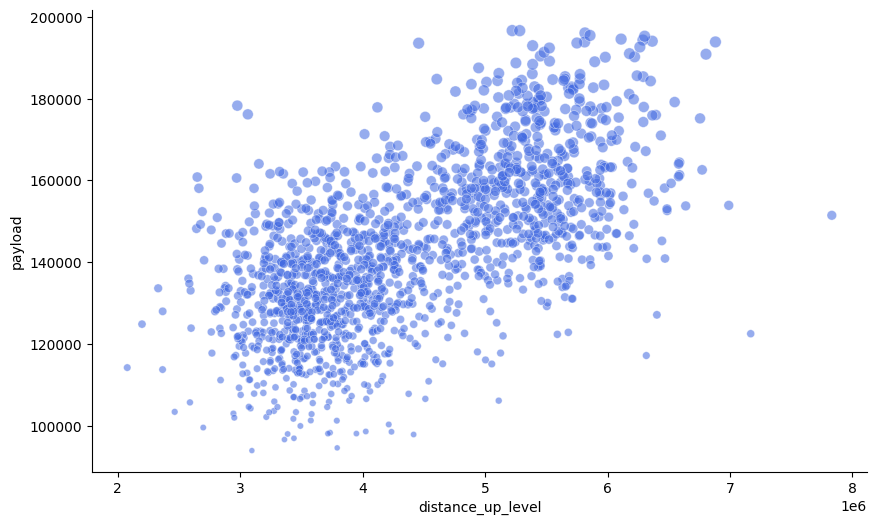

In [37]:
# relación entre distance_up_level y payload
plt.figure(figsize=(10, 6))

# definimos una paleta de colores
custom_palette = {0: 'slategray', 1: 'tomato'}

sns.scatterplot(x='distance_up_level',  
                y='payload',
                data=df_selected, 
                #hue='payload_validation',
                #style='payload_validation',
                size='payload',
                markers=['o', 'h'],
                legend= False,
                alpha=0.55,
                #linewidth=0.3,
                #edgecolor='darkgrey',
                #palette = custom_palette,
                color='royalblue'
                )

# mejoramos la visualización
sns.despine()

In [38]:
# relación entre distance_up_level y payload
plt.figure(figsize=(10, 6))

# definimos una paleta de colores
custom_palette = {0: 'slategray', 1: 'tomato'}

sns.scatterplot(x='truck_avail',  
                y='payload',
                data=df_selected, 
                #hue='payload_validation',
                #style='payload_validation',
                size='payload',
                markers=['o', 'h'],
                legend= False,
                alpha=0.55,
                #linewidth=0.3,
                #edgecolor='darkgrey',
                #palette = custom_palette,
                color='royalblue'
                )

# mejoramos la visualización
sns.despine()

ValueError: Could not interpret value `truck_avail` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

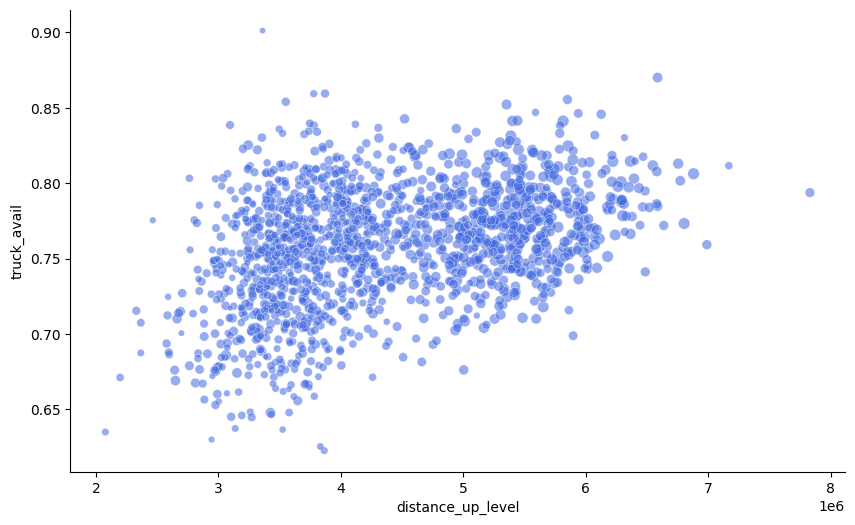

In [ ]:
# relación entre distance_up_level y truck_avail
plt.figure(figsize=(10, 6))
# definimos una paleta de colores
custom_palette = {0: 'slategray', 1: 'tomato'}
sns.scatterplot(x='distance_up_level',
                y='truck_avail', 
                data=df_selected, 
                #hue='payload_validation', 
                #style='payload_validation',
                size='payload',
                markers=['o', 's'],
                legend= False,
                alpha=0.55,
                #linewidth=0.3,
                #edgecolor='darkgrey',
                #palette = custom_palette,
                color='royalblue'
                )

# mejoramos la visualización
sns.despine()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Datos de ejemplo
x = df_selected.truck_avail
y = df_selected.distance_up_level
z = df_selected.payload

# Crear gráfico de dispersión 3D
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(size=7, 
                color='royalblue', 
                opacity=0.5, 
                #line=dict(color='blue', width=0.01)
                )
)])

# Personalizar el eje X
fig.update_layout(
    scene=dict(
        xaxis=dict(
            title='truck_avail',  # Título del eje X
            titlefont=dict(size=18, color='rgba(62, 62, 62, 0.8)'),  # Fuente del título
            tickfont=dict(size=14, color='rgba(62, 62, 62, 0.8)'),  # Fuente de las etiquetas
            gridcolor='rgba(62, 62, 62, 0.2)',  # Color de las líneas de la cuadrícula
            zerolinecolor='rgba(62, 62, 62, 0.5)',  # Color de la línea en cero
            showgrid=True,  # Mostrar cuadrícula
            showline=True,  # Mostrar línea del eje
            showticklabels=True,  # Mostrar etiquetas
            linecolor='rgba(62, 62, 62, 0.8)',  # Color de la línea del eje
            ticks='outside',  # Posición de las marcas
            backgroundcolor='rgba(50, 50, 50, 0.5)'  # Fondo más oscuro para ejes
        ),
        yaxis=dict(
            title='distance_up_level',
            titlefont=dict(size=18, color='rgba(62, 62, 62, 0.8)'),
            tickfont=dict(size=14, color='rgba(62, 62, 62, 0.8)'),
            gridcolor='rgba(62, 62, 62, 0.2)',
            zerolinecolor='rgba(62, 62, 62, 0.5)',
            showgrid=True,
            showline=True,
            showticklabels=True,
            linecolor='rgba(62, 62, 62, 0.8)',
            ticks='outside',
            backgroundcolor='rgba(50, 50, 50, 0.5)'
        ),
        zaxis=dict(
            title='payload',
            titlefont=dict(size=18, color='rgba(62, 62, 62, 0.8)'),
            tickfont=dict(size=14, color='rgba(62, 62, 62, 0.8)'),
            gridcolor='rgba(62, 62, 62, 0.2)',
            zerolinecolor='rgba(62, 62, 62, 0.5)',
            showgrid=True,
            showline=True,
            showticklabels=True,
            linecolor='rgba(62, 62, 62, 1)',
            ticks='outside',
            backgroundcolor='rgba(50, 50, 50, 0.5)'
            
            )
    ),
    title='Gráfico de Dispersión 3D Interactivo',
    width=1000,
    height=1000,
    margin=dict(l=0, r=0, b=100, t=50),
    paper_bgcolor='rgba(255, 255, 255, 1)',
    plot_bgcolor='rgba(10, 10, 10, 1)'
)

# Mostrar el gráfico
fig.show()
